In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Car Price dataset

In [2]:
#Importing dataset
car_price_dataset = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Let's explore the top 5 rows
car_price_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_price_dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

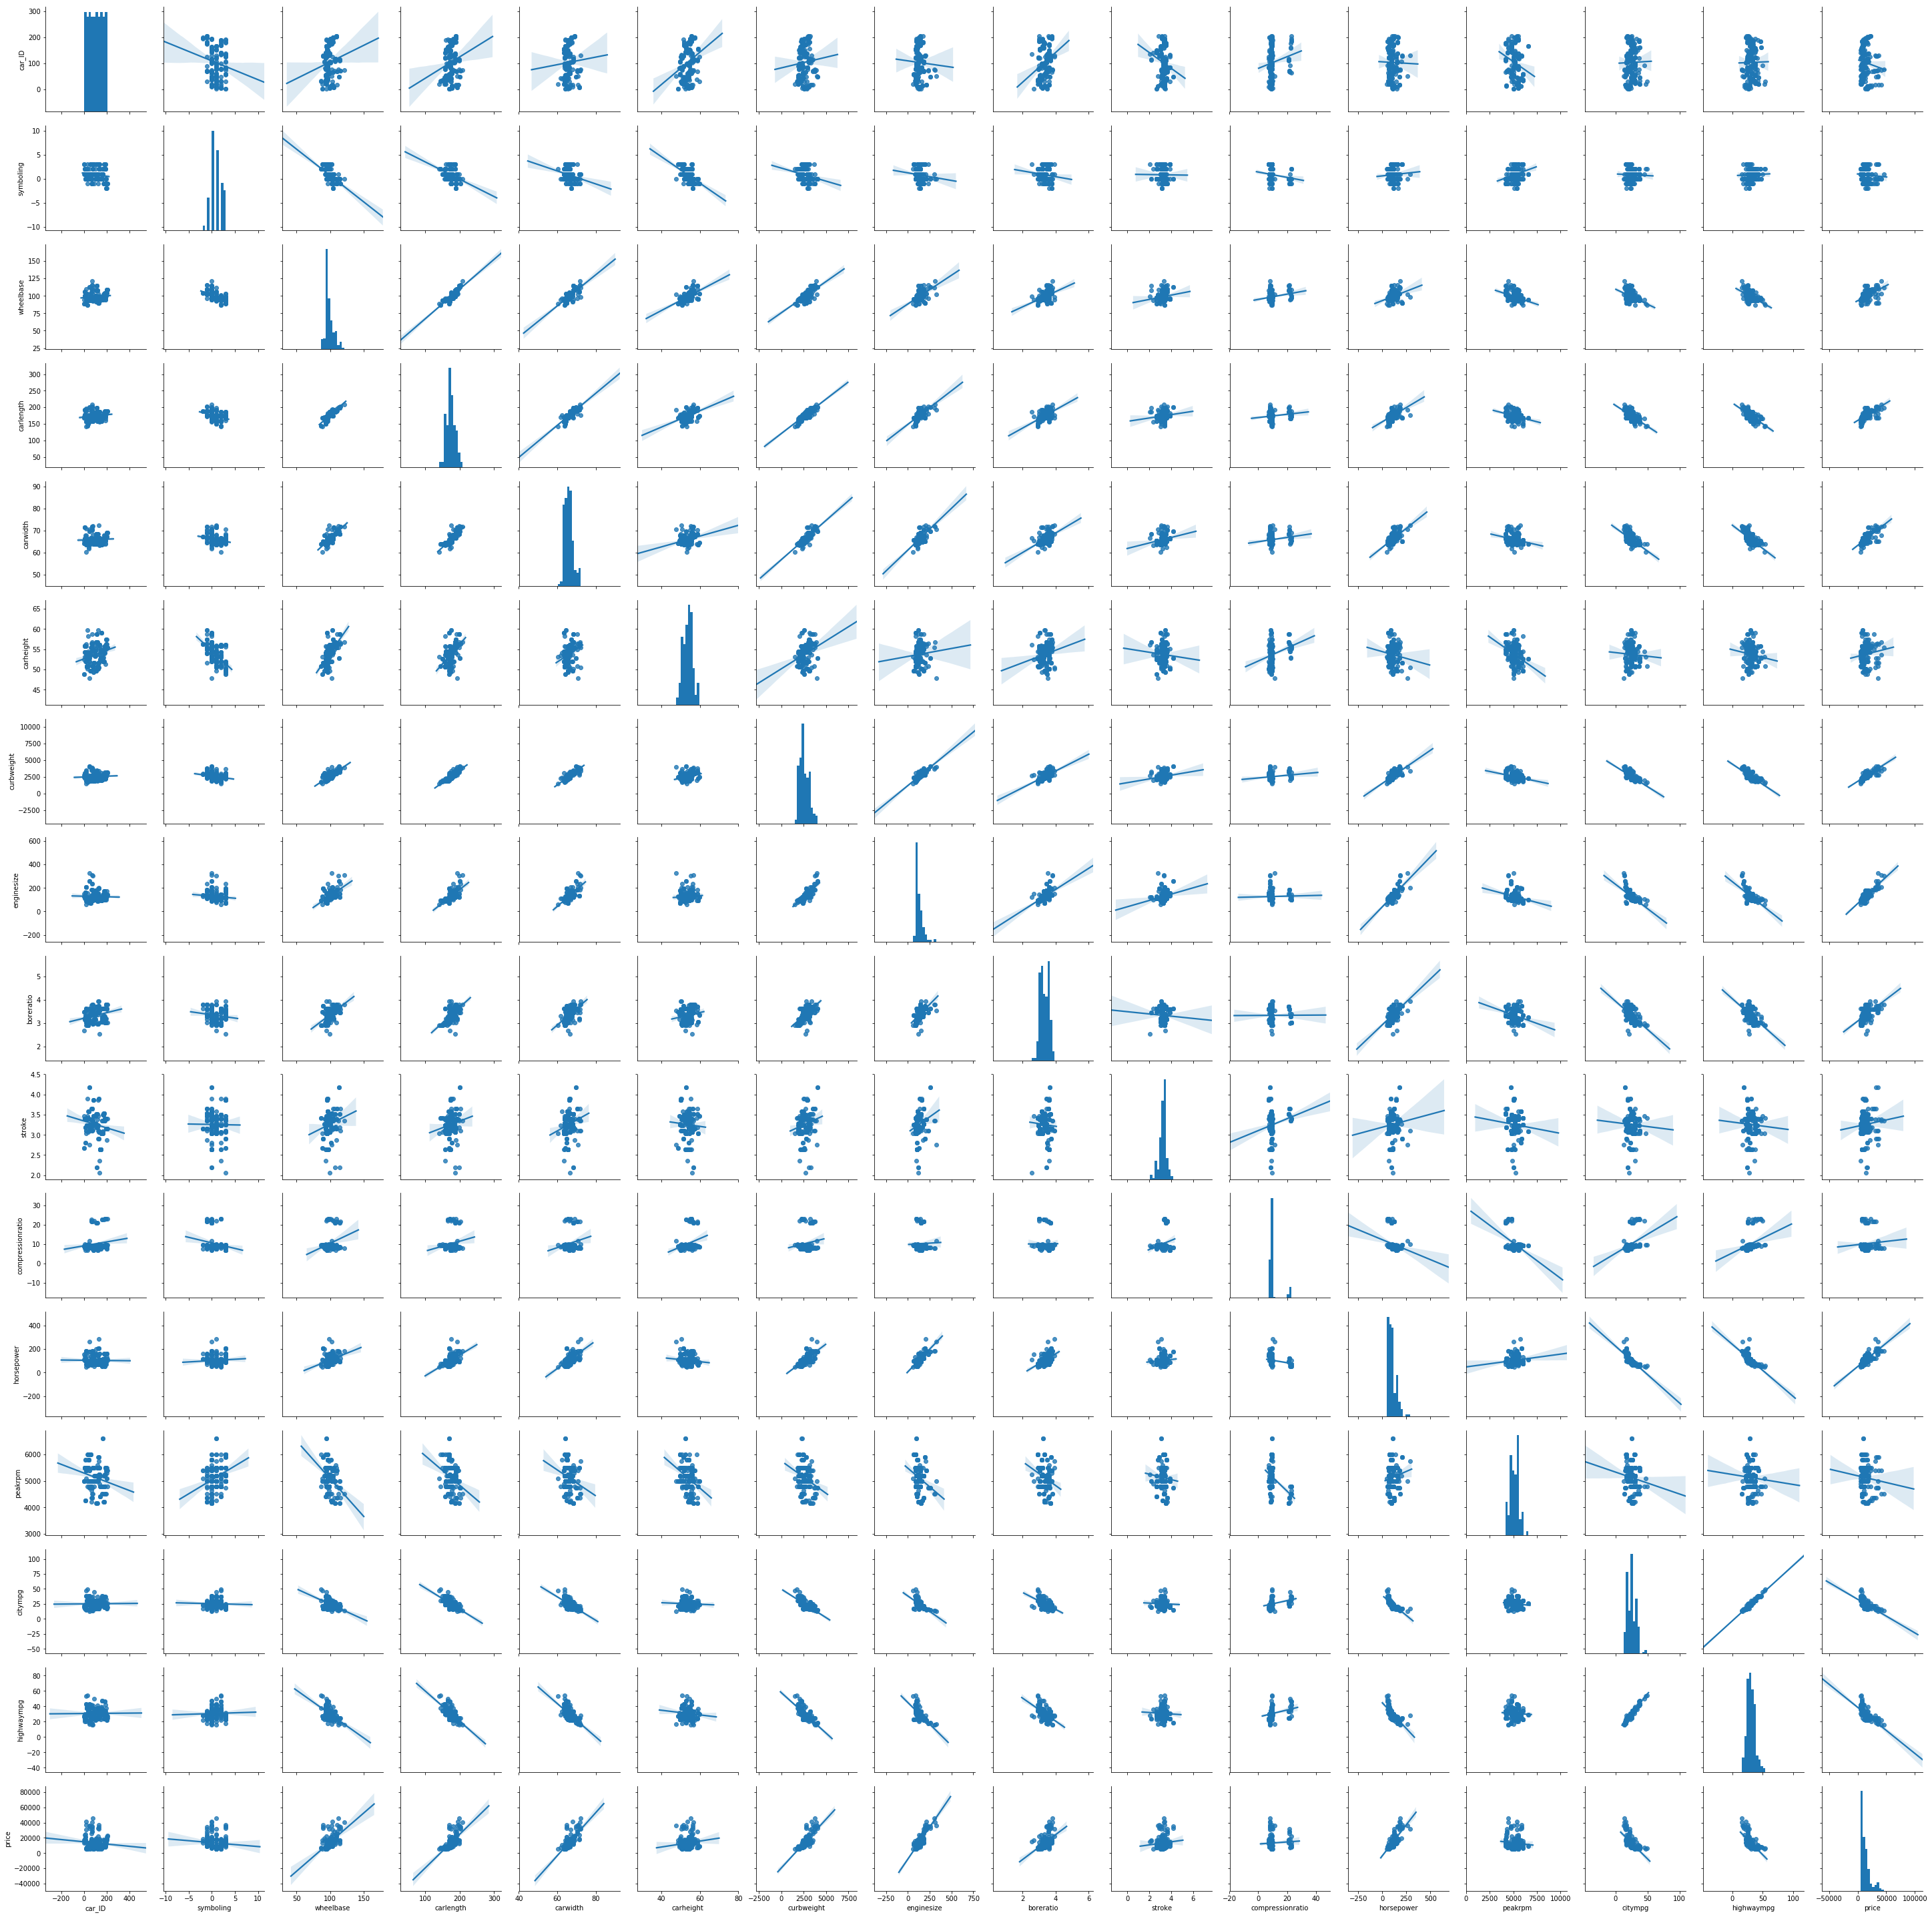

In [6]:
sns.pairplot(car_price_dataset, kind="reg")
plt.show()

# Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [7]:
categorical_columns = list(car_price_dataset.columns[car_price_dataset.dtypes == 'object'])
categorical_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [8]:
def plot_bar_percentages(dataframe, col_list):
# Plot the bar chart with percentage of different car features
    plt.figure(figsize=(20, 17))
    for id,val in enumerate(col_list):
        plt.subplot(3,4,id+1)
        col_values = (dataframe[val].value_counts(normalize=True)*100).sort_index()
        values = col_values.sort_index()
        ax = values.plot.bar()
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(val, fontsize=10)
        
        #showLabels(ax)

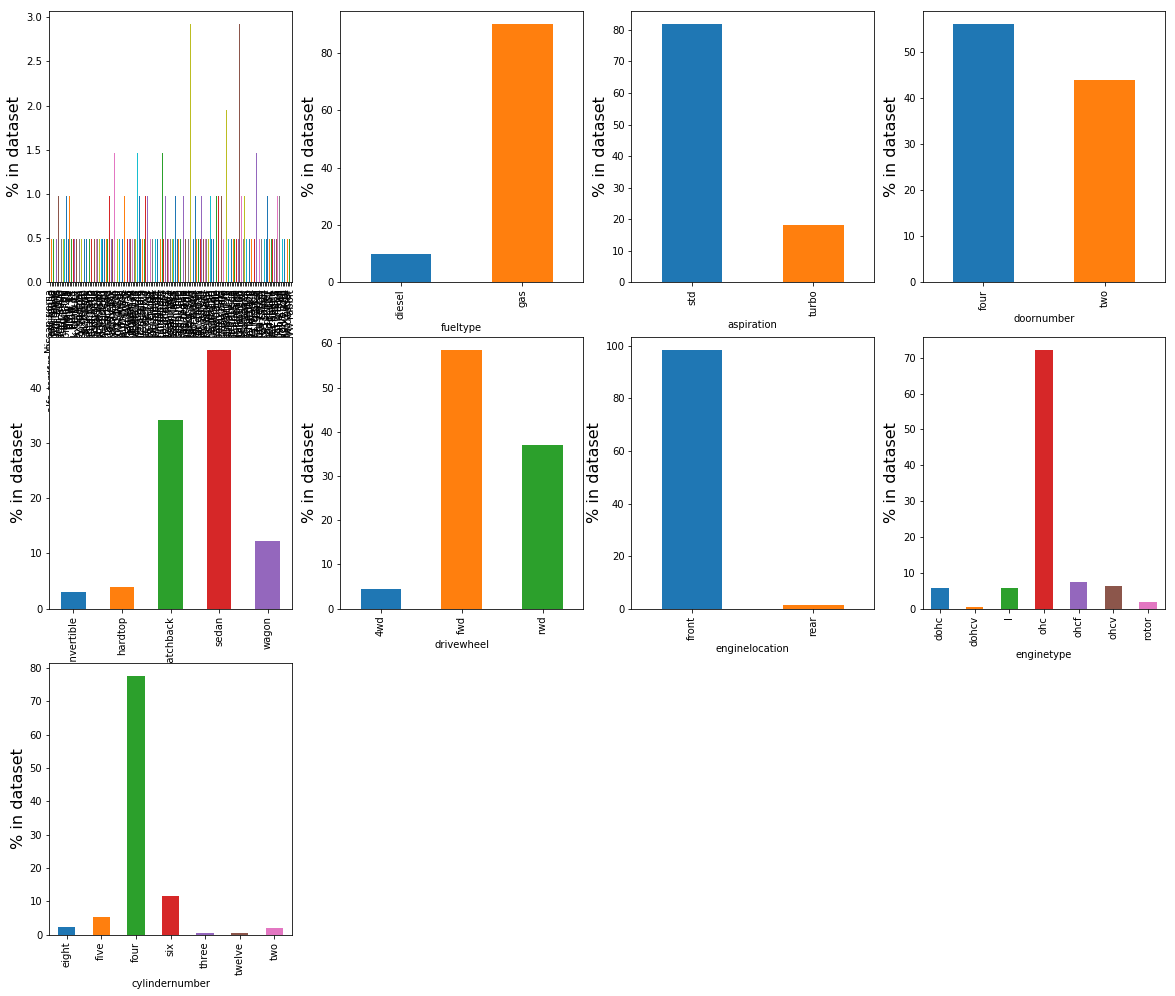

In [9]:
plot_bar_percentages(car_price_dataset,categorical_columns[:-1])

## Step 3: Data Preparation

##### Check and remove null columns

In [10]:
#Remove null columns where all values are null
nullcolumns = (car_price_dataset.isnull().sum()/len(car_price_dataset))
columns_to_be_dropped = list(nullcolumns[nullcolumns.values>=1].index)  
print(columns_to_be_dropped)
car_price_dataset.drop(labels = columns_to_be_dropped,axis =1,inplace=True)     
car_price_dataset.shape

[]


(205, 26)

##### Drop any duplicates

In [11]:
# Dropping Duplicates if any
car_price_dataset=car_price_dataset.drop_duplicates()

In [12]:
#Remove the car_ID will not be used in the pricing model
car_price_dataset.drop(['car_ID'],axis=1, inplace=True)

In [13]:
#CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'
#extracing the company for from the CarName and remove the CarName because it will not be used in the data model
car_price_dataset['company'] = car_price_dataset['CarName'].apply(lambda x: x.split()[0])
car_price_dataset['company'].unique()
car_price_dataset.drop(['CarName'],axis=1, inplace=True)

In [14]:
car_price_dataset['company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
car_price_dataset['company'].replace(['toyouta'],'toyota',inplace=True)
car_price_dataset['company'].replace(['porcshce'],'porsche',inplace=True)
car_price_dataset['company'].replace(['maxda'],'mazda',inplace=True)
car_price_dataset['company'].replace(['Nissan'],'nissan',inplace=True)
car_price_dataset['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
car_price_dataset['drivewheel'].replace(['4wd'],'fwd',inplace=True)

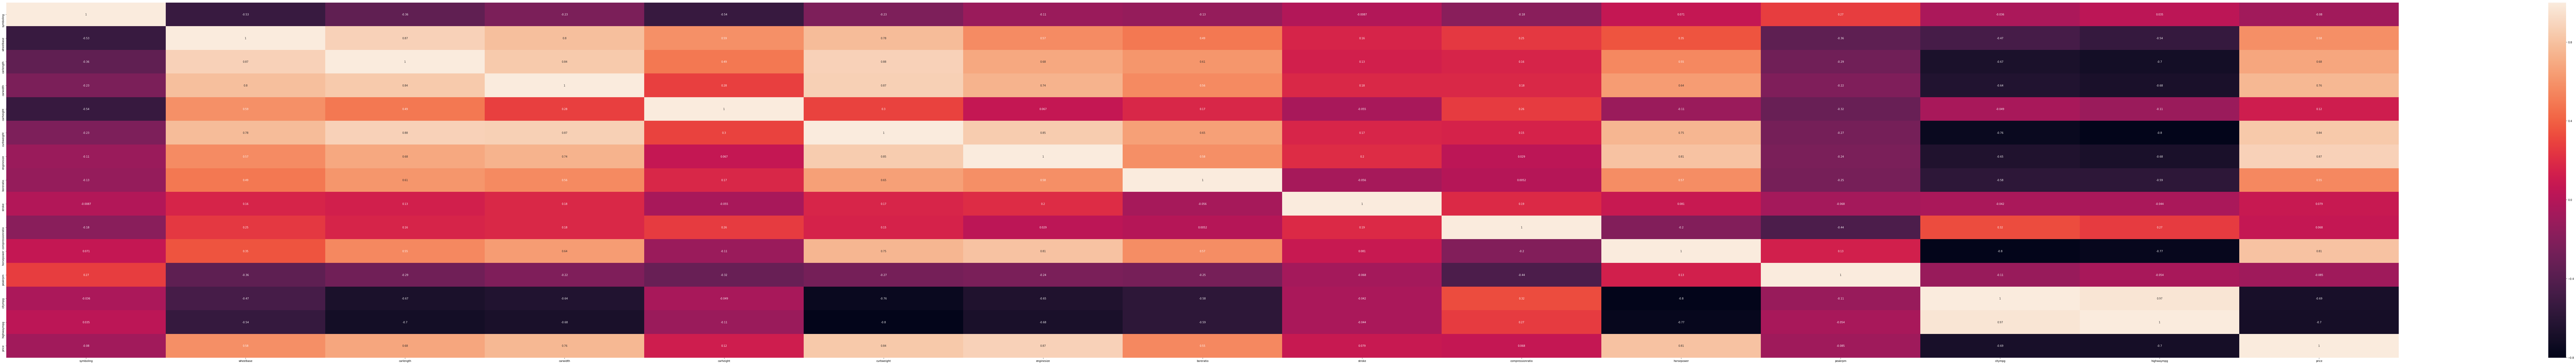

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [16]:
plt.figure(figsize = car_price_dataset.shape)
cor=car_price_dataset.corr()
sns.heatmap(cor, annot = True)
plt.show()
display(cor)

###### wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, citympg, highwaympg are highly correlated with price

In [17]:
categorical_variables = list(car_price_dataset.columns[car_price_dataset.dtypes == 'object'])
categorical_variables

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

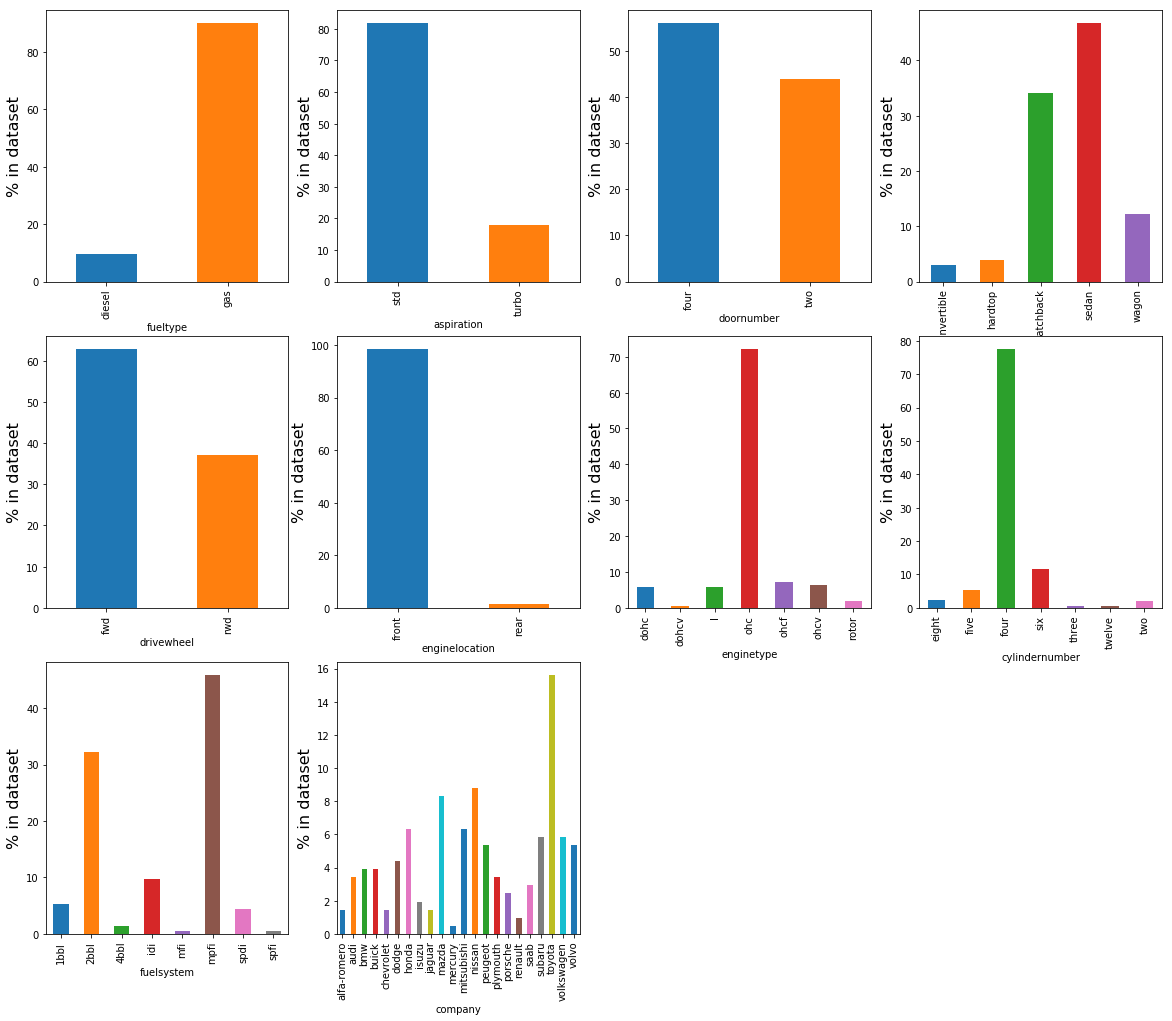

In [18]:
# market percentage of car's with respect to features
plot_bar_percentages(car_price_dataset,categorical_variables)

fueltype: gas   
fuelsystem: mpfi
company: toyota
aspiration: std
drivewheel: fwd
enginelocation: four
enginetype: ohc
cylindernumber: four
Carbody: Sedan
doornumbers: four
engine location: front

In [19]:
def plot_boxplot(dataframe, columns):
    plt.figure(figsize=(30,15))
    plt.xticks(rotation=90)
    for id,col in enumerate(columns):
        plt.subplot(3,4,id+1)
        sns.boxplot(x = col, y = 'price', data = car_price_dataset)
    plt.show()        

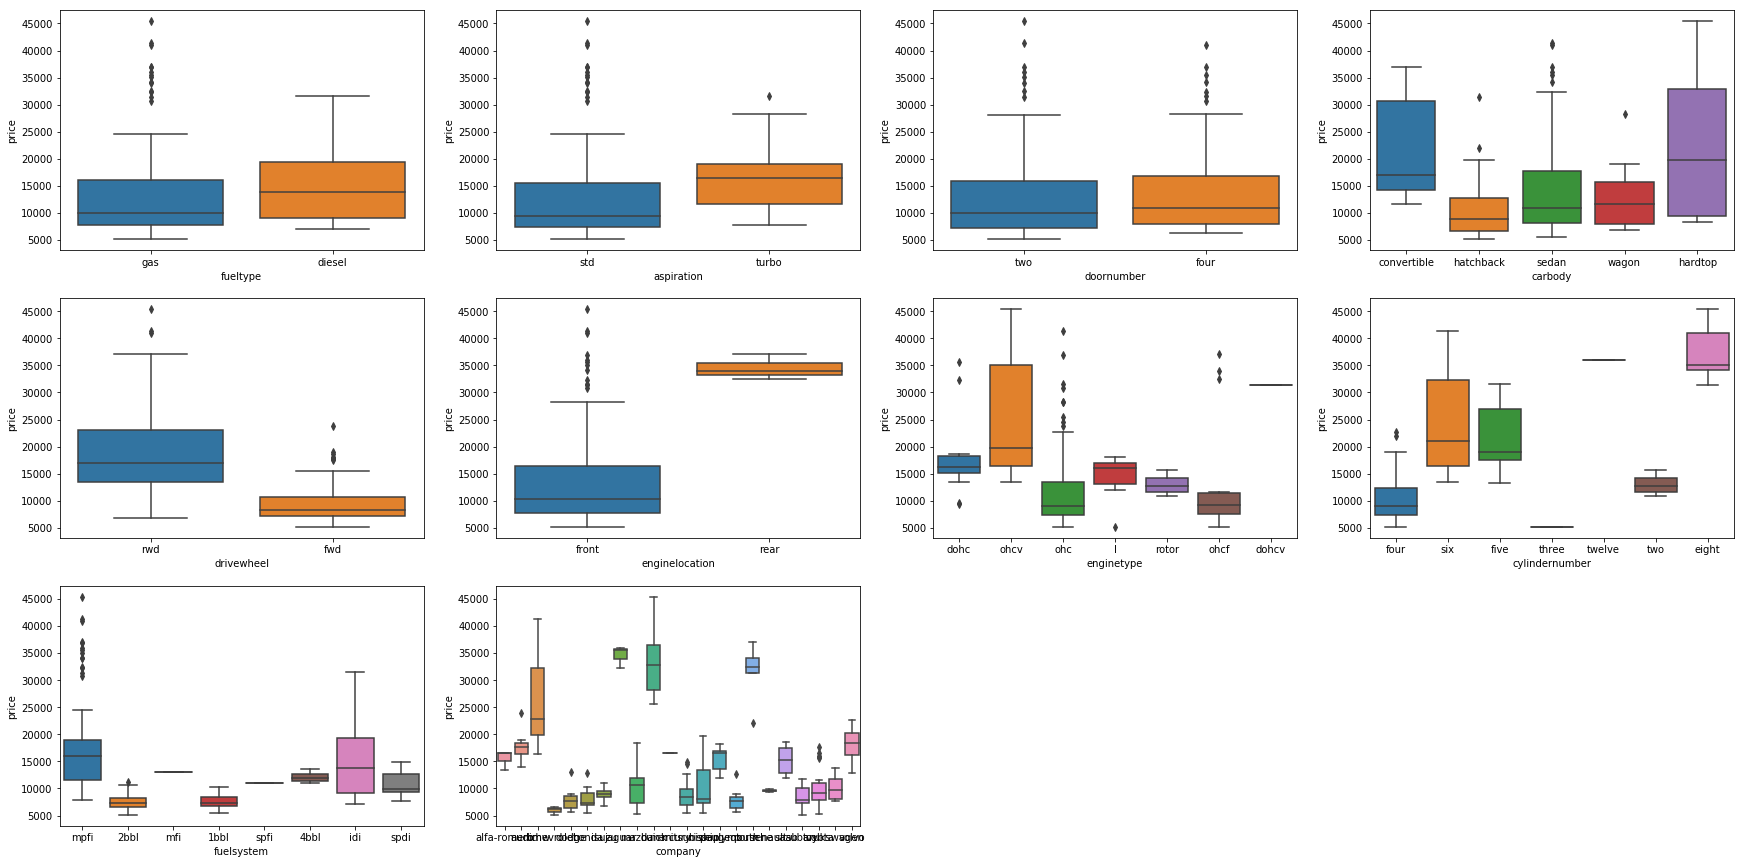

In [20]:
plot_boxplot(car_price_dataset,categorical_variables)

In [21]:
def plot_distribution(dataframe, column_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for id,col in enumerate(column_list):
        plt.subplot(3,5,id+1)  
        sns.distplot(dataframe[col]);
    plt.show()

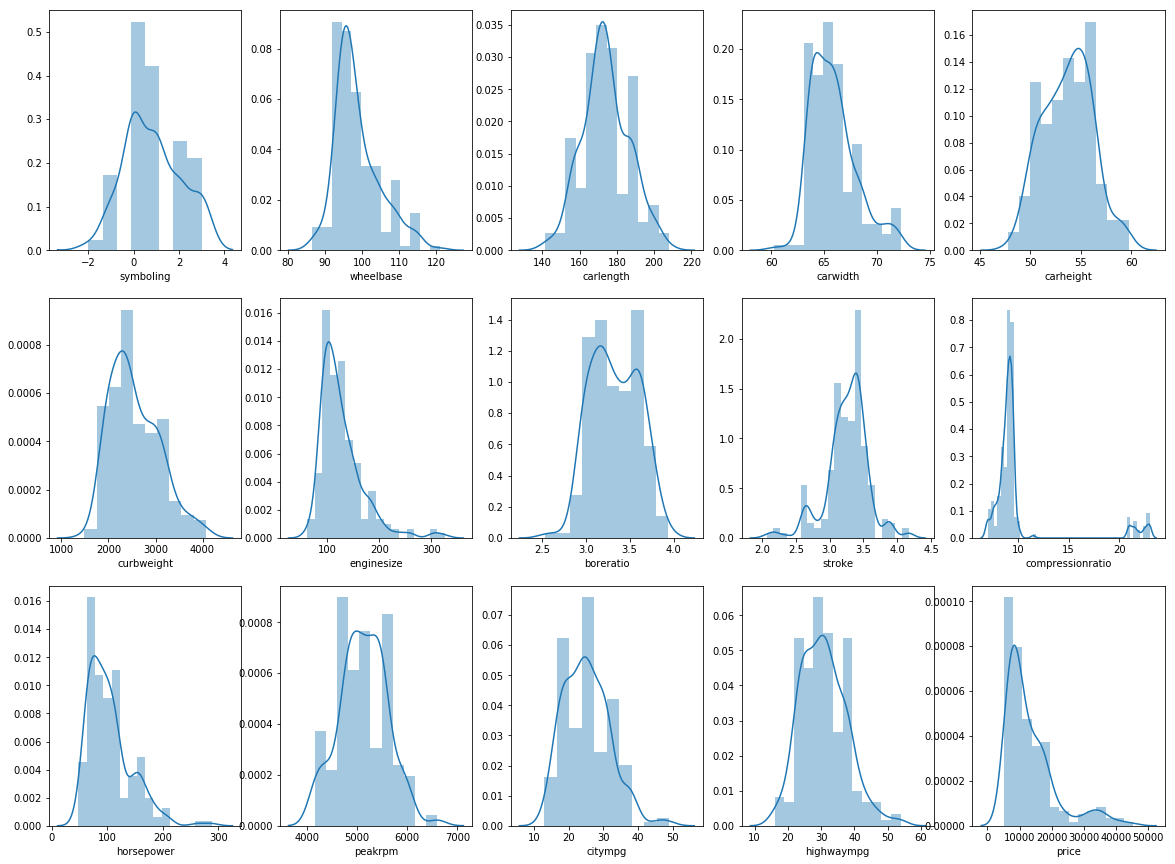

In [22]:
numeric_variables = list(car_price_dataset.columns[car_price_dataset.dtypes != 'object'])
plot_distribution(car_price_dataset, numeric_variables)

In [23]:
car_price_dataset['fueltype'] = car_price_dataset['fueltype'].apply(lambda x: 0 if x=='gas' else 1).astype(int)
# if aspiration is std then value is 0 else if turbo 1
car_price_dataset['aspiration'] = car_price_dataset['aspiration'].apply(lambda x: 0 if x=='std' else 1).astype(int)
#convert the door number to int type
car_price_dataset['doornumber'] = car_price_dataset['doornumber'].apply(lambda x: 2 if x=='two' else 4).astype(int)
#convert the enginelocation to int type
car_price_dataset['enginelocation'] = car_price_dataset['enginelocation'].apply(lambda x: 0 if x=='front' else 1).astype(int)
def convertStringToNumber(x):
    if x=='two':
        return 2
    if x=='three':
        return 3
    if x=='four':
        return 4    
    if x=='five':
        return 5
    if x=='six':
        return 6
    if x=='eight':
        return 8
    if x=='twelve':
        return 8
#convert the cylindernumber to int type
car_price_dataset['cylindernumber'] = car_price_dataset['cylindernumber'].apply(convertStringToNumber).astype(int)

In [24]:
car_price_dataset.drop(['company'],inplace=True,axis=1)
car_price_dataset = pd.get_dummies(car_price_dataset)
car_price_dataset.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

# Splitting the avilable data into training and testing set.
np.random.seed(0)
df_train, df_test = train_test_split(car_price_dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the Features

In [26]:
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','wheelbase','curbweight', 'carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0,0,4,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0,0,2,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0,0,2,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,2,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0,1,4,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [28]:
y_train = df_train.pop('price')
X_train = df_train

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Step 5: Building a linear model

In [30]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)
display(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
col = X_train.columns[rfe.support_]
display(col)
display(X_train.columns[~rfe.support_])

[('symboling', False, 4),
 ('fueltype', True, 1),
 ('aspiration', False, 6),
 ('doornumber', False, 20),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('carheight', False, 3),
 ('curbweight', True, 1),
 ('cylindernumber', False, 8),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 5),
 ('highwaympg', True, 1),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 7),
 ('carbody_hatchback', False, 15),
 ('carbody_sedan', False, 19),
 ('carbody_wagon', False, 13),
 ('drivewheel_fwd', False, 11),
 ('drivewheel_rwd', False, 2),
 ('enginetype_dohc', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 9),
 ('enginetype_ohcf', False, 10),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_1bbl', False, 16),
 ('fuelsystem_2bbl', Fal

Index(['fueltype', 'enginelocation', 'wheelbase', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'highwaympg', 'carbody_convertible', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_idi', 'fuelsystem_spdi'],
      dtype='object')

Index(['symboling', 'aspiration', 'doornumber', 'carlength', 'carheight',
       'cylindernumber', 'citympg', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_ohc', 'enginetype_ohcf', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spfi'],
      dtype='object')

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [32]:
def getLinearRegressionModel(X_train):
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
    #Let's see the summary of our linear model
    print(lm.summary())
    return X_train, lm

In [33]:
X_train_rfe, lm=getLinearRegressionModel(X_train_rfe)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     67.43
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.08e-55
Time:                        21:54:33   Log-Likelihood:                 191.05
No. Observations:                 143   AIC:                            -342.1
Df Residuals:                     123   BIC:                            -282.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2019    

In [34]:
#removing carwidth with high p-value 0.248
X_train1 = X_train_rfe.drop('carwidth', axis=1)

In [35]:
X_train1, lm1=getLinearRegressionModel(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     70.90
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.44e-56
Time:                        21:54:33   Log-Likelihood:                 190.27
No. Observations:                 143   AIC:                            -342.5
Df Residuals:                     124   BIC:                            -286.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2022    

In [36]:
#dropping enginetype_dohcv with high p value 0.251      
X_train2 = X_train1.drop('enginetype_dohcv', axis=1)
X_train2, lm2=getLinearRegressionModel(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     74.80
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.32e-57
Time:                        21:54:33   Log-Likelihood:                 189.51
No. Observations:                 143   AIC:                            -343.0
Df Residuals:                     125   BIC:                            -289.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1719    

In [37]:
def getVIF(X):
    X = X.drop(['const'], axis=1)
    
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)
    vif

In [38]:
getVIF(X_train2)

,Features,VIF
0,fueltype,inf
16,fuelsystem_idi,inf
7,compressionratio,126.030000
3,curbweight,75.380000
4,enginesize,44.080000
2,wheelbase,30.100000
8,horsepower,24.740000
6,stroke,23.740000
10,highwaympg,20.430000
5,boreratio,14.090000


In [39]:
#dropping fueltype with infinite VIF
X_train3 = X_train2.drop('fueltype', axis=1)
X_train3, lm3=getLinearRegressionModel(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     74.80
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.32e-57
Time:                        21:54:34   Log-Likelihood:                 189.51
No. Observations:                 143   AIC:                            -343.0
Df Residuals:                     125   BIC:                            -289.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1719    

In [40]:
getVIF(X_train3)

,Features,VIF
6,compressionratio,126.03
15,fuelsystem_idi,83.37
2,curbweight,75.38
3,enginesize,44.08
1,wheelbase,30.10
7,horsepower,24.74
5,stroke,23.74
9,highwaympg,20.43
4,boreratio,14.09
8,peakrpm,11.79


In [41]:
#dropping fueltype with infinite VIF
X_train4 = X_train3.drop('fuelsystem_idi', axis=1)
X_train4, lm4=getLinearRegressionModel(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     74.41
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.76e-56
Time:                        21:54:34   Log-Likelihood:                 184.73
No. Observations:                 143   AIC:                            -335.5
Df Residuals:                     126   BIC:                            -285.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2308    

In [42]:
getVIF(X_train4)

,Features,VIF
2,curbweight,75.37
3,enginesize,40.18
1,wheelbase,29.75
7,horsepower,24.64
5,stroke,20.52
4,boreratio,14.08
9,highwaympg,10.38
8,peakrpm,10.03
6,compressionratio,3.26
13,enginetype_ohcv,2.33


In [43]:
#drop compressionratio with high P value 0.603      
X_train5 = X_train4.drop('compressionratio', axis=1)
X_train5, lm5=getLinearRegressionModel(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     79.81
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.72e-57
Time:                        21:54:35   Log-Likelihood:                 184.57
No. Observations:                 143   AIC:                            -337.1
Df Residuals:                     127   BIC:                            -289.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2460    

In [44]:
getVIF(X_train5)

,Features,VIF
2,curbweight,68.92
3,enginesize,40.16
1,wheelbase,29.75
6,horsepower,24.28
5,stroke,20.51
4,boreratio,13.58
7,peakrpm,8.68
8,highwaympg,8.37
12,enginetype_ohcv,2.31
10,enginetype_dohc,1.57


In [45]:
#drop fuelsystem_spdi with high p Value 0.223      
X_train6 = X_train5.drop('fuelsystem_spdi', axis=1)
X_train6, lm6=getLinearRegressionModel(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     85.07
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.05e-57
Time:                        21:54:35   Log-Likelihood:                 183.73
No. Observations:                 143   AIC:                            -337.5
Df Residuals:                     128   BIC:                            -293.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2551    

In [46]:
#dropping peakrpm with high p value 0.052      
X_train7 = X_train6.drop('peakrpm', axis=1)
X_train7, lm7=getLinearRegressionModel(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     89.34
Date:                Mon, 27 May 2019   Prob (F-statistic):           7.13e-58
Time:                        21:54:35   Log-Likelihood:                 181.61
No. Observations:                 143   AIC:                            -335.2
Df Residuals:                     129   BIC:                            -293.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1966    

In [47]:
getVIF(X_train7)

,Features,VIF
2,curbweight,66.78
3,enginesize,30.47
1,wheelbase,26.87
5,stroke,16.04
6,horsepower,14.73
4,boreratio,13.46
7,highwaympg,7.17
11,enginetype_ohcv,2.18
9,enginetype_dohc,1.54
10,enginetype_l,1.51


In [48]:
X_train8 = X_train7.drop('curbweight', axis=1)
X_train8, lm8=getLinearRegressionModel(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     88.93
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.46e-56
Time:                        21:54:35   Log-Likelihood:                 175.69
No. Observations:                 143   AIC:                            -325.4
Df Residuals:                     130   BIC:                            -286.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1654    

In [49]:
#drop highwaympg with high P value 0.064      
X_train9 = X_train8.drop('highwaympg', axis=1)
X_train9, lm9=getLinearRegressionModel(X_train9)    

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     94.90
Date:                Mon, 27 May 2019   Prob (F-statistic):           8.01e-57
Time:                        21:54:35   Log-Likelihood:                 173.80
No. Observations:                 143   AIC:                            -323.6
Df Residuals:                     131   BIC:                            -288.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0804    

In [50]:
getVIF(X_train9)

,Features,VIF
2,enginesize,24.80
1,wheelbase,14.04
5,horsepower,12.12
3,boreratio,9.56
4,stroke,5.99
9,enginetype_ohcv,2.06
7,enginetype_dohc,1.54
8,enginetype_l,1.46
10,enginetype_rotor,1.35
6,carbody_convertible,1.33


In [51]:
# dropping wheelbase because it is correlated with enginesize 
X_train10 = X_train9.drop('wheelbase', axis=1)
X_train10, lm10=getLinearRegressionModel(X_train10)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     74.07
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.49e-49
Time:                        21:54:35   Log-Likelihood:                 152.00
No. Observations:                 143   AIC:                            -282.0
Df Residuals:                     132   BIC:                            -249.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0300    

In [52]:
#drop enginetype_l with high P Value 0.329
X_train11 = X_train10.drop('enginetype_l', axis=1)
X_train11, lm11=getLinearRegressionModel(X_train11)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     82.22
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.99e-50
Time:                        21:54:36   Log-Likelihood:                 151.48
No. Observations:                 143   AIC:                            -283.0
Df Residuals:                     133   BIC:                            -253.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0323    

In [53]:
#droping enginelocation with high P value 0.268
X_train12 = X_train11.drop('enginelocation', axis=1)
X_train12, lm12=getLinearRegressionModel(X_train12)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     92.18
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.11e-50
Time:                        21:54:36   Log-Likelihood:                 150.82
No. Observations:                 143   AIC:                            -283.6
Df Residuals:                     134   BIC:                            -257.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0289    

In [54]:
getVIF(X_train12)

,Features,VIF
0,enginesize,18.72
3,horsepower,10.95
1,boreratio,7.93
2,stroke,5.11
6,enginetype_ohcv,1.94
5,enginetype_dohc,1.50
7,enginetype_rotor,1.33
4,carbody_convertible,1.19


In [55]:
#droping horsepower since it is corelated with engine size 
X_train13 = X_train12.drop('horsepower', axis=1)
X_train13, lm13=getLinearRegressionModel(X_train13)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     95.36
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.25e-49
Time:                        21:54:36   Log-Likelihood:                 144.40
No. Observations:                 143   AIC:                            -272.8
Df Residuals:                     135   BIC:                            -249.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0177    

In [56]:
#dropping boreration with high P value 0.071
X_train14 = X_train13.drop('boreratio', axis=1)
X_train14, lm14=getLinearRegressionModel(X_train14)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     108.8
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.99e-49
Time:                        21:54:36   Log-Likelihood:                 142.66
No. Observations:                 143   AIC:                            -271.3
Df Residuals:                     136   BIC:                            -250.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0659    

In [57]:
getVIF(X_train14)

,Features,VIF
0,enginesize,6.10
1,stroke,4.56
4,enginetype_ohcv,1.68
3,enginetype_dohc,1.37
2,carbody_convertible,1.15
5,enginetype_rotor,1.09


In [58]:
#dropping carbody_convertible with high P value 0.066
X_train15 = X_train14.drop('carbody_convertible', axis=1)
X_train15, lm15=getLinearRegressionModel(X_train15)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.04e-50
Time:                        21:54:36   Log-Likelihood:                 140.87
No. Observations:                 143   AIC:                            -269.7
Df Residuals:                     137   BIC:                            -252.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0564      0.028  

## Step 7: Residual Analysis of the train data

In [59]:
y_train_price = lm15.predict(X_train15)

Text(0.5, 0, 'Errors')

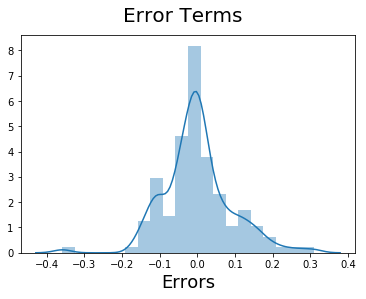

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [61]:
num_vars = ['symboling','wheelbase','curbweight', 'carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [62]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.112903,0.177419,3.129032,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.064516,0.0,0.048387,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.999736,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.247676,0.0,0.216335,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,2.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,4.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,4.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.000000,0.0,0.000000,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [63]:
y_test = df_test.pop('price')
X_test = df_test

In [64]:
# Adding constant variable to test dataframe
X_test_m15 = sm.add_constant(X_test)

In [65]:
# Creating X_test_m15 dataframe by dropping variables from X_test_m15

X_test_m15 = X_test_m15.drop(list(set(X_test_m15.columns.values) - set(X_train15.columns.values)), axis = 1)

In [66]:
# Making predictions using the fifteen model

y_pred_m15 = lm15.predict(X_test_m15)


## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

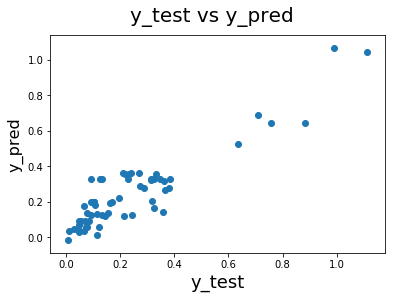

In [67]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m15)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [68]:
lm15.params

const              -0.056434
enginesize          1.492282
stroke             -0.141142
enginetype_dohc    -0.075637
enginetype_ohcv    -0.183708
enginetype_rotor    0.285898
dtype: float64

##### We can see that the equation of our best fitted line is:

###### $ price = -0.056 + 1.492 * enginesize - 0.141 * stroke - 0.076 * enginetype_dohc - 0.184 * enginetype_ohcv + 0.286 * enginetype_rotor
